## Import libraries

In [2]:
import fasttext
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors

## Filter dataset for words predicted as homographs

In [3]:
df = pd.read_csv('datasets/updated_dataset.csv')

In [4]:
filtered_df = df[df['predictions']==1]
filtered_df

,Unnamed: 0,id,pl,uk,false_friends,orthographic_sim,predictions
0,0,1,śniadanie,сніданок,0,1,1
1,1,2,wegetarianin,вегетаріанський,0,1,1
2,2,3,napój,напій,0,1,1
3,3,4,kawa,кава,0,1,1
4,4,5,sok,сік,0,1,1
...,...,...,...,...,...,...,...
802,802,803,szesnaście,козаки,2,0,1
806,806,807,malarz,магазинчик,2,0,1
812,812,813,strata,порадувати,2,0,1
864,864,865,kolejny,лужний,2,0,1


In [5]:
grouped_counts = filtered_df.groupby('false_friends').count()
print(grouped_counts)

               Unnamed: 0   id   pl   uk  orthographic_sim  predictions
false_friends                                                          
0                     168  168  168  168               168          168
1                     223  223  223  223               223          223
2                      24   24   24   24                24           24


In [8]:
filtered_df['false_friends'] = filtered_df['false_friends'].replace({2:0})

/tmp/ipykernel_50785/1066336543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['false_friends'] = filtered_df['false_friends'].replace({2:0})


In [9]:
grouped_counts = filtered_df.groupby('false_friends').count()
grouped_counts

,Unnamed: 0,id,pl,uk,orthographic_sim,predictions
false_friends,,,,,,
0,192,192,192,192,192,192
1,223,223,223,223,223,223


In [10]:
row_count = filtered_df['false_friends'].value_counts()
row_count

1    223
0    192
Name: false_friends, dtype: int64

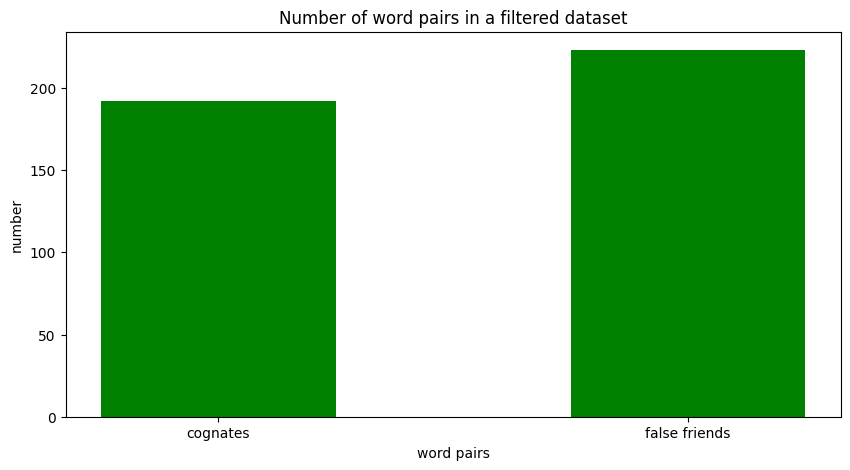

In [15]:
categories = ['cognates', 'false friends']

values = sorted(list(row_count.values))

fig = plt.figure(figsize=(10,5))

plt.bar(categories, values, color='green', width=0.5)

plt.xlabel("word pairs")
plt.ylabel("number")
plt.title("Number of word pairs in a filtered dataset")
plt.show()

## Similarity between Ukrainian and Polish word pairs

In [16]:
from fast_vector import FastVector
uk_dictionary = FastVector(vector_file='wiki_vectors/wiki.uk.vec')
pl_dictionary = FastVector(vector_file='wiki_vectors/wiki.pl.vec')

reading word vectors from wiki_vectors/wiki.uk.vec


In [ ]:
uk_vector = uk_dictionary["кіт"]
pl_vector = pl_dictionary["kot"]
print(FastVector.cosine_similarity(uk_vector, pl_vector))

0.09863913206925096


In [ ]:
uk_dictionary.apply_transform('uk.txt')
pl_dictionary.apply_transform('pl.txt')

In [ ]:
print(FastVector.cosine_similarity(uk_dictionary["кіт"], pl_dictionary["kot"]))
# Result should be 0.43

0.48332476480896835


## Predict cognates and false friends

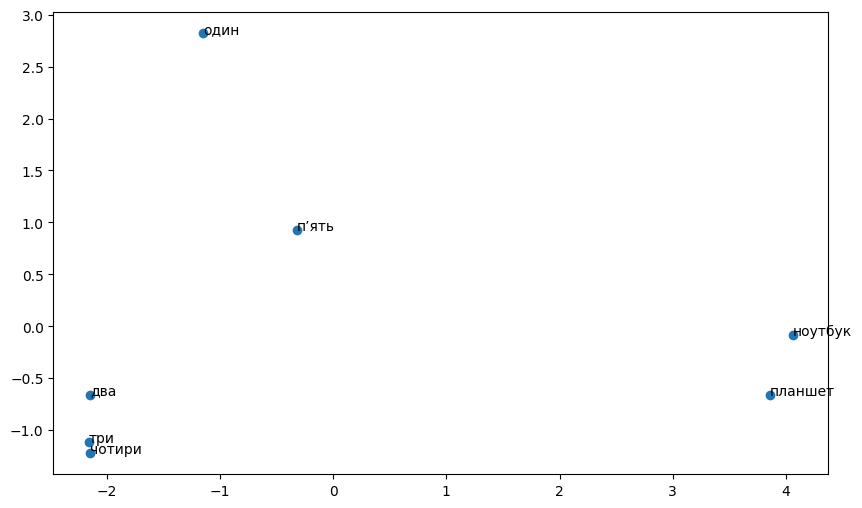

In [ ]:
uk_vectors = ["один", "два", "три", "чотири", "пʼять", "ноутбук", "планшет"]

word_vectors_subset = [uk_dictionary[word] for word in uk_vectors]

# Perform dimensionality reduction
pca = PCA(n_components=2)  # Change to 3 for 3D visualization
word_vectors_2d = pca.fit_transform(word_vectors_subset)

# Create a scatter plot of the word vectors
plt.figure(figsize=(10, 6))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])


# Add labels for each word
for i, word in enumerate(uk_vectors):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

# Show the plot
plt.show()

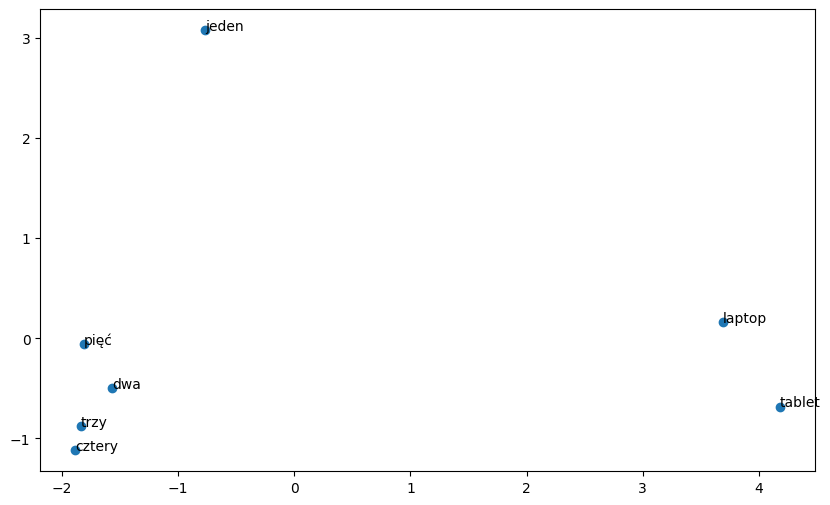

In [ ]:
pl_vectors = ["jeden", "dwa", "trzy", "cztery", "pięć", "laptop", "tablet"]

word_vectors_subset = [pl_dictionary[word] for word in pl_vectors]

# Perform dimensionality reduction
pca = PCA(n_components=2)  # Change to 3 for 3D visualization
word_vectors_2d = pca.fit_transform(word_vectors_subset)

# Create a scatter plot of the word vectors
plt.figure(figsize=(10, 6))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])


# Add labels for each word
for i, word in enumerate(pl_vectors):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

# Show the plot
plt.show()

In [52]:
preds = []
labels = []

for row in filtered_df.iterrows():
  uk_word = row[1][3]
  pl_word = row[1][2]
  label = row[1][4]
  if uk_word not in uk_dictionary or pl_word not in pl_dictionary:
    continue
  res = FastVector.cosine_similarity(uk_dictionary[uk_word], pl_dictionary[pl_word])
  # false friends
  if res < 0.5:
    preds.append(1)
  else:
    preds.append(0)
  labels.append(label)


In [44]:
c = ["вулиця", "музика", "музика  "]

for i in c:
  if i in pl_dictionary:
    print('ok')
  else:
    print('not ok')

ok
ok
not ok


In [51]:
filtered_df

,Unnamed: 0,id,pl,uk,false_friends,orthographic_sim,predictions
0,0,1,śniadanie,сніданок,0,1,1
1,1,2,wegetarianin,вегетаріанський,0,1,1
2,2,3,napój,напій,0,1,1
3,3,4,kawa,кава,0,1,1
4,4,5,sok,сік,0,1,1
...,...,...,...,...,...,...,...
749,802,803,szesnaście,козаки,0,0,1
752,806,807,malarz,магазинчик,0,0,1
756,812,813,strata,порадувати,0,0,1
801,864,865,kolejny,лужний,0,0,1


In [53]:
len(preds)

380

In [54]:
len(labels)

380

In [55]:
y_true = labels

In [56]:
print(y_true)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [57]:
print(classification_report(y_true, preds))

              precision    recall  f1-score   support

           0       0.85      0.77      0.80       188
           1       0.79      0.86      0.83       192

    accuracy                           0.82       380
   macro avg       0.82      0.82      0.82       380
weighted avg       0.82      0.82      0.82       380



In [58]:
matrix = confusion_matrix(y_true, preds)

[Text(0, 0.5, 'cognates'), Text(0, 1.5, 'false friends')]

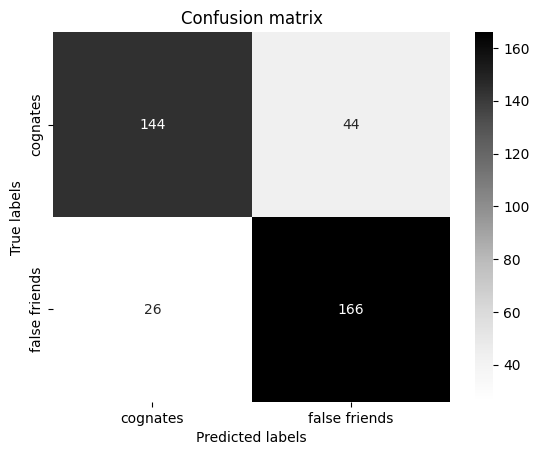

In [59]:
ax = plt.subplot()
sns.heatmap(matrix,annot=True,fmt='.0f',cmap='Greys')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['cognates', 'false friends'])
ax.yaxis.set_ticklabels(['cognates', 'false friends'])